In [54]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

##Getting the sequences

#The function is defined as 'get_sequences_from_file', and the input file is in fasta format. 
#A for-loop is formed which retrieves DNA sequences of each species from the fasta files and they are parsed to build a sequence data dictionary.

In [55]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

##Translating nucleotide strings

#This function creates a for-loop that translates nucleotides into a string of amino acids, reading nucleotides in threes as codons, starting at position 1. 
#The functions commands the string of amino acid to be stopped when a stop codon is encountered.

In [56]:
def translate_function(string_nucleotides): 
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
     aa_seq_string = []
     index = 0
        
     for pos in range(0,len(string_nucleotides)//3):
        codon = string_nucleotides[index:index+3]
        index += 3
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":
            break
        else:
            aa = mito_table.forward_table[codon]
            aa_seq_string.append(aa)
            
     return(aa_seq_string)

##Using an alternative function to translate a string of amino acids
#Packages from biopython library are used to easily translate sequences into amino acids.
#The Bio.Alphabet package is used where a finite number of letters are used (https://biopython.org/DIST/docs/api/Bio), 
for instance DNA sequences are only made up of 4 letters. 
#Using Bio.SeqUtils.ProtParam ensures that amino acid/protein sequences are not combined with anything else(https://biopython.org/DIST/docs/api/Bio.Alphabet-pysrc.html).



In [57]:
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq

In [58]:
def alternate_translation_fn(dna_seq):
    sequence = Seq(str(dna_seq), generic_dna)
    aa_seq = sequence.translate(table = 2, to_stop = True)
    return(aa_seq)

In [59]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

##Amino acids analysis function
#The functions below calculate the molecular weight and the GC content of each sequence

In [60]:
def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(str(aa_seq))
    m_weight= analyzed_seq.molecular_weight()
    return(m_weight)

In [61]:
def gc_content(dna_seq):
    count = dna_seq.count("G") + dna_seq.count("C")
    gc = 100 * count / len(dna_seq)
    return(gc)

#A species list is formed from the imported penguin dataset

In [62]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

##Adding extra columns
#A molecular weight and a GC content columns were added to the penguin dataset using python library called numpy and a for-loop was created to generate values for each species.

In [63]:
import numpy as np
penguins_df = penguins_df.assign(Molecular_weight = np.nan, GC_content = np.nan)

In [64]:
for key, value in cytb_seqs.items():
    aa_seq = alternate_translation_fn(value)
    mol_weight = compute_molecular_weight(aa_seq)
    gc_cont = gc_content(value)
    index = penguins_df[penguins_df["species"] == key].index
    penguins_df.Molecular_weight[index] = mol_weight
    penguins_df.GC_content[index] = gc_cont

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [65]:
print(penguins_df)
print(species_list)

                    species   mass  Molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474
['Aptenodytes forsteri', 'Aptenodytes patagonicus', 'Eudyptes chrysocome', 'Eudyptes chrysolophus', 'Eudyptes sclateri', 'Eudyptula minor', 'Pygoscelis ade

##Visualization of the data
#Using matplotlib, a bar-chart plot was created using 'species' as the x-axis and 'mass' as the y-axis. The plot was given a title.

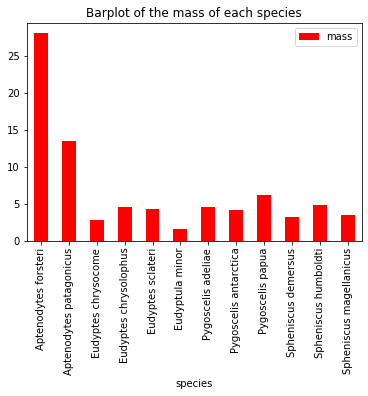

In [66]:
penguins_df.plot(x = "species", y= "mass", kind = "bar", color = "red",
                title = "Barplot of the mass of each species")

#The smallest penguin species is Eudyptes minor

##Visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)
#Seaborn was used to achieve this.

In [67]:
import seaborn as sb

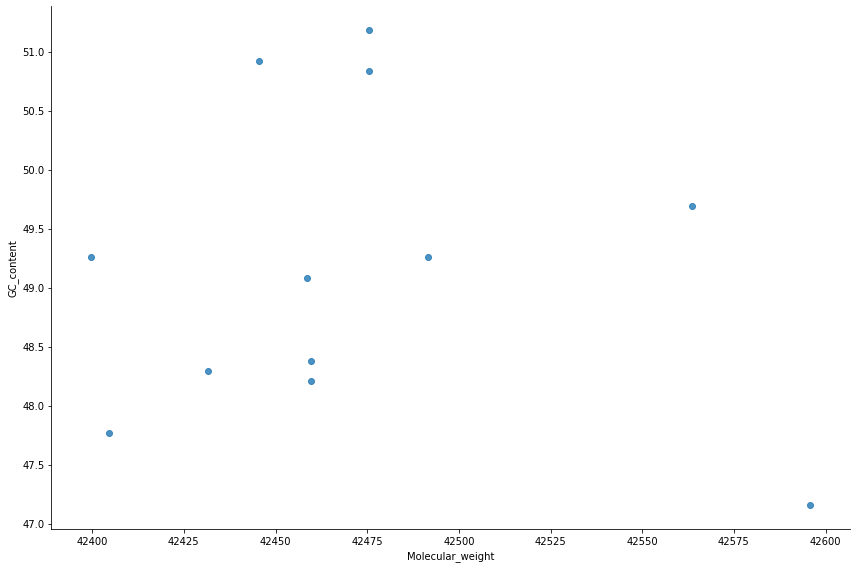

In [68]:
sb.lmplot("Molecular_weight","GC_content", data = penguins_df,
          fit_reg = False, height = 8, aspect = 1.5)

In [69]:
penguins_df.to_csv ("penguins_mass_cytb.csv")

# BONUS
# Using matplotlib to make a bar-plot chart of species vs GC content

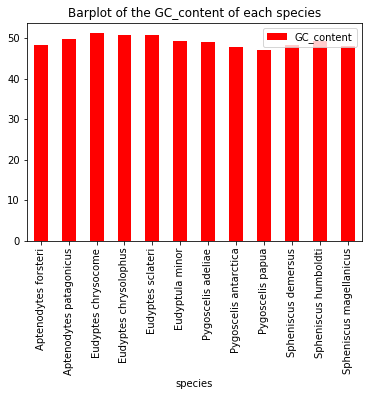

In [70]:
penguins_df.plot(x = "species", y= "GC_content", kind = "bar", color = "red",
                title = "Barplot of the GC_content of each species")